In [52]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import warnings
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
from scipy import stats
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.utils import resample

In [16]:
df = pd.read_excel('bank-full.xlsx')

In [17]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [18]:
df.shape

(45211, 17)

In [19]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [21]:
df.groupby('Target').size()

Target
no     39922
yes     5289
dtype: int64

In [24]:
# convert all variables of the type “object” into categorical variables, so that they are stored properly

categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day', 'poutcome', 'Target']
for column in categorical_columns:
    df[column] = df[column].astype('category')

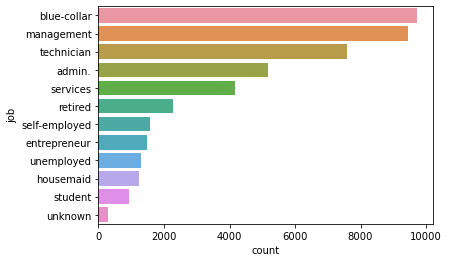

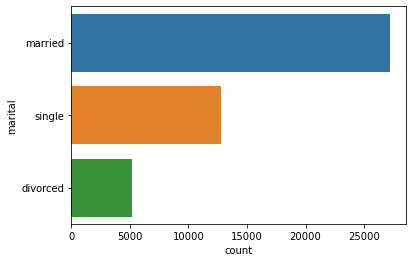

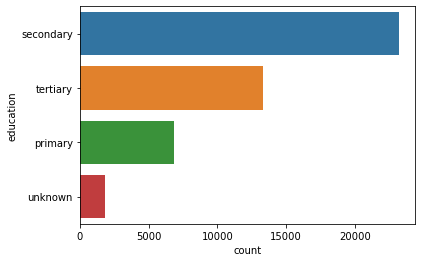

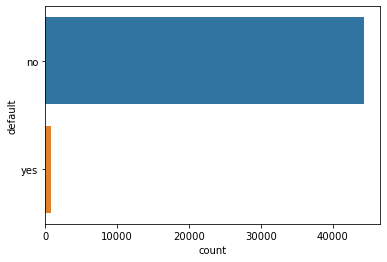

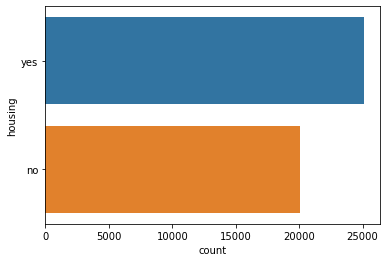

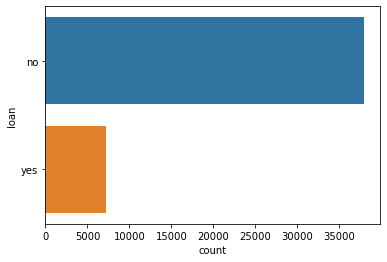

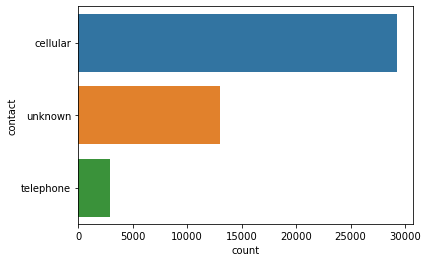

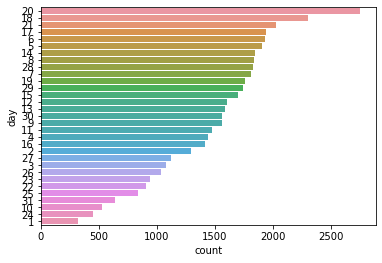

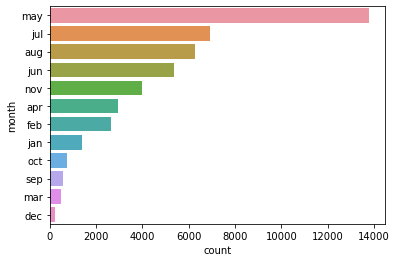

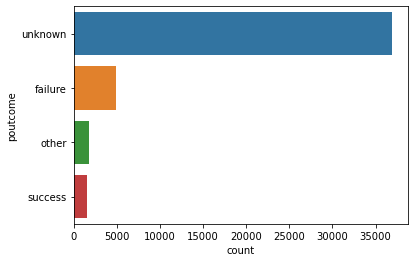

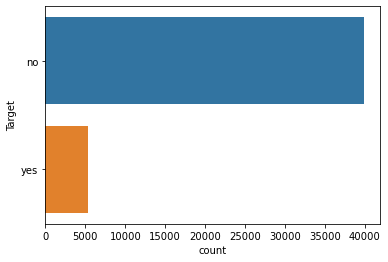

In [26]:
# some univariate analysis
for feature in df.dtypes[df.dtypes == 'category'].index:
    sns.countplot(y=feature, data=df, order = df[feature].value_counts().index)
    plt.show()

In [27]:
# looking at some values to get initial ideas

df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [28]:
df.job.value_counts()/df.job.count()

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64

#### there are some unknown job types 

In [29]:
df.education.value_counts()/df.education.count()

secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64

In [30]:
df.Target.value_counts()/df.Target.count()

no     0.883015
yes    0.116985
Name: Target, dtype: float64

#### A very few percentage have said yes, about 11-12 %. The data set itself is very biased/skewed. 

In [31]:
#some modifications to the dataset to get rid of unknown values

df_new=df.copy()
df_new = df_new[df_new.job != 'unknown']
df_new = df_new[df_new.marital != 'unknown']
df_new = df_new[df_new.education != 'unknown']
df_new = df_new[df_new.housing != 'unknown']
df_new = df_new[df_new.loan != 'unknown']

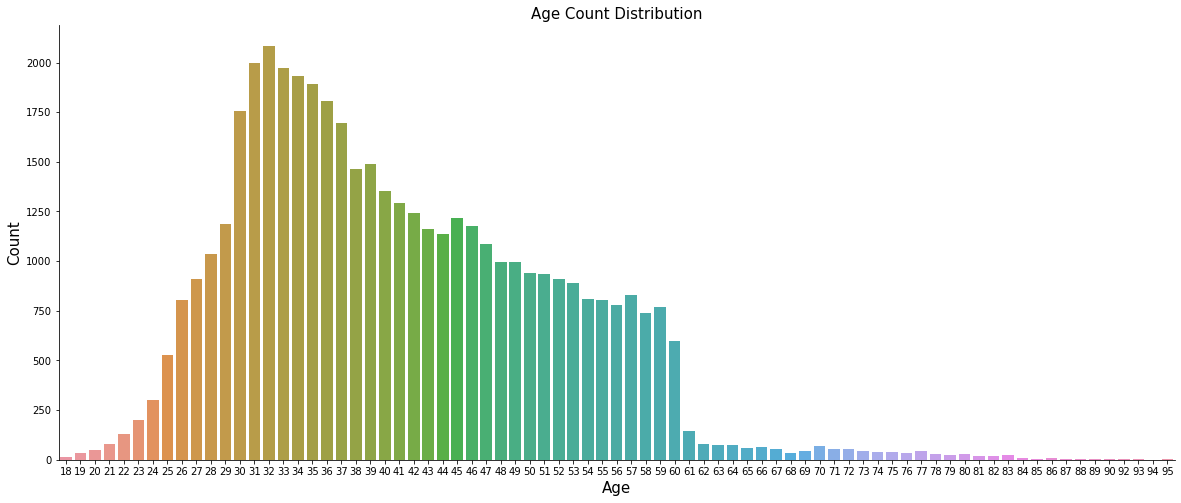

In [34]:
# graphical representation of some numerical features
numerical = ['campaign', 'pdays',
       'previous','age']
warnings.filterwarnings('ignore')
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data =  df[numerical])
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

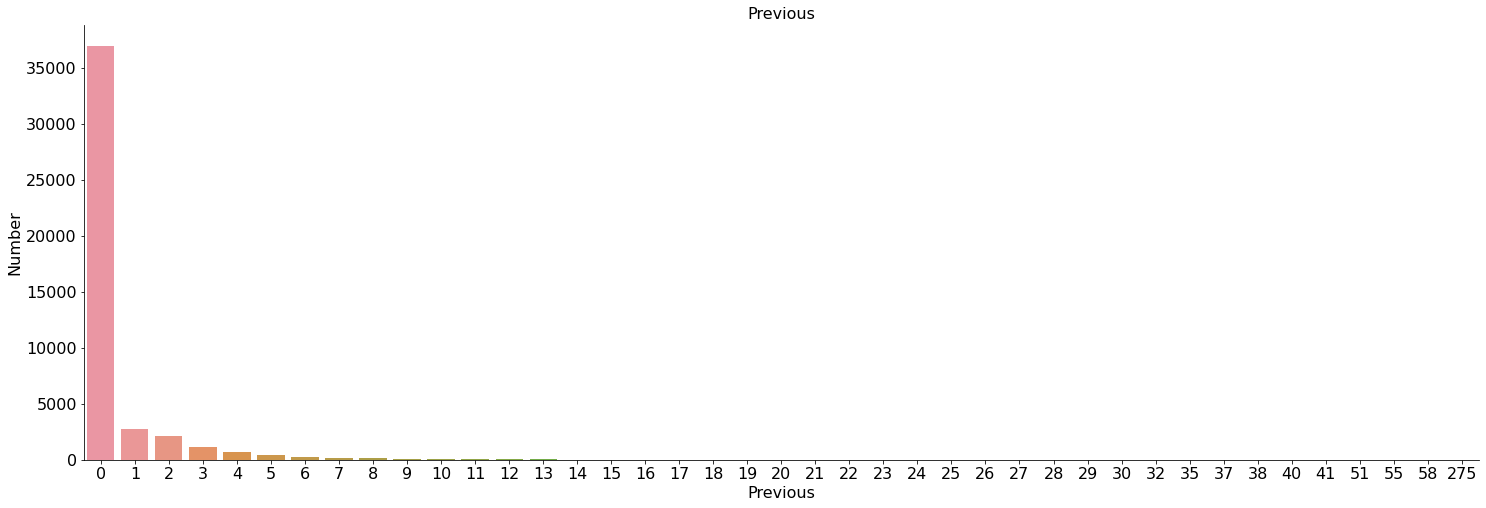

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'previous', data = df[cols_num])
ax.set_xlabel('Previous', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Previous', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

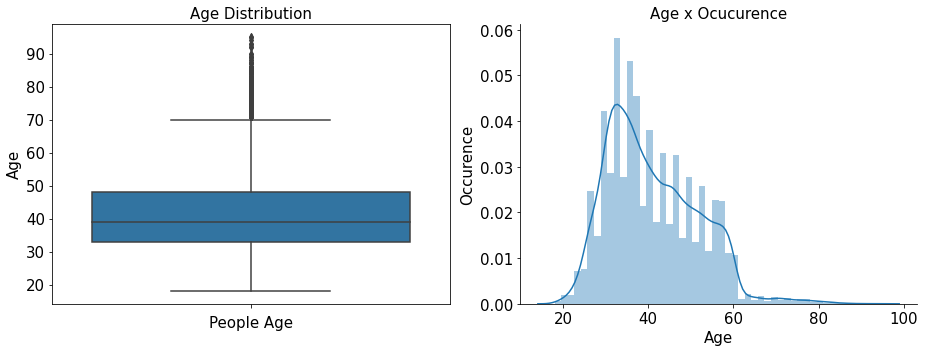

In [36]:
ig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = df[cols_num], orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df[cols_num]['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [37]:
# turning categorical into variables

categorical = ['job', 'marital', 
       'education', 'default',
       'housing', 'loan', 'contact', 'month',
       'day', 'poutcome']
df[categorical]
cols_new_cat=pd.get_dummies(df[categorical],drop_first = False)
cols_new_cat.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,day_26,day_27,day_28,day_29,day_30,day_31,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


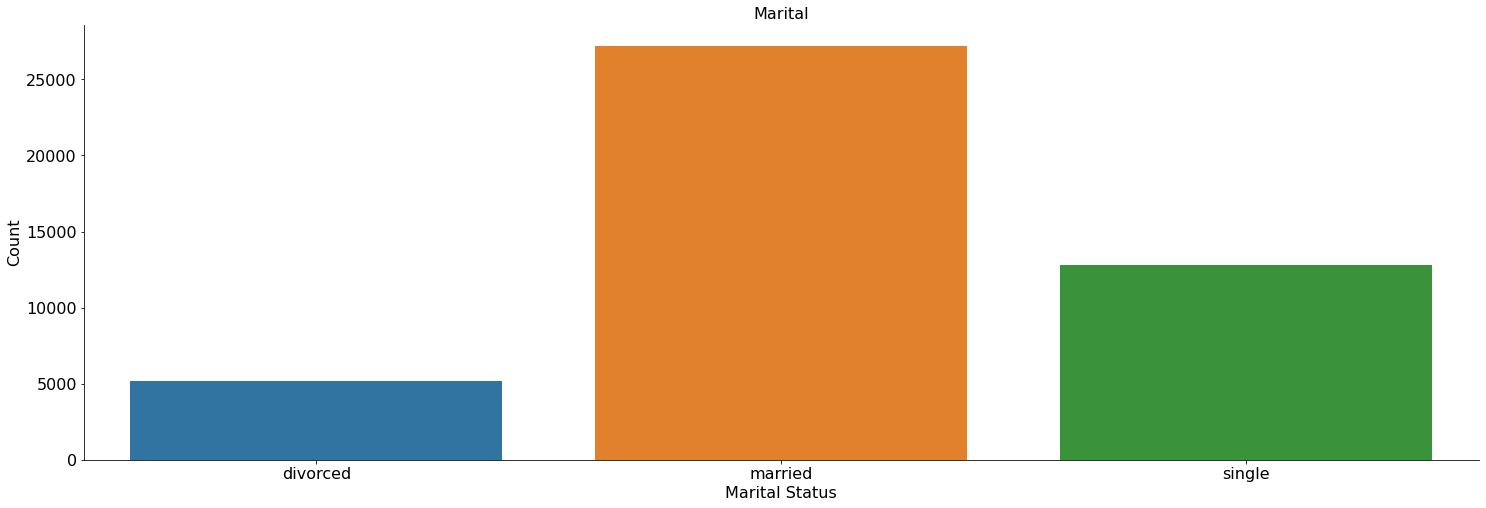

In [39]:
# some graphical representations
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'marital', data = df[categorical])
ax.set_xlabel('Marital Status', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Marital', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()


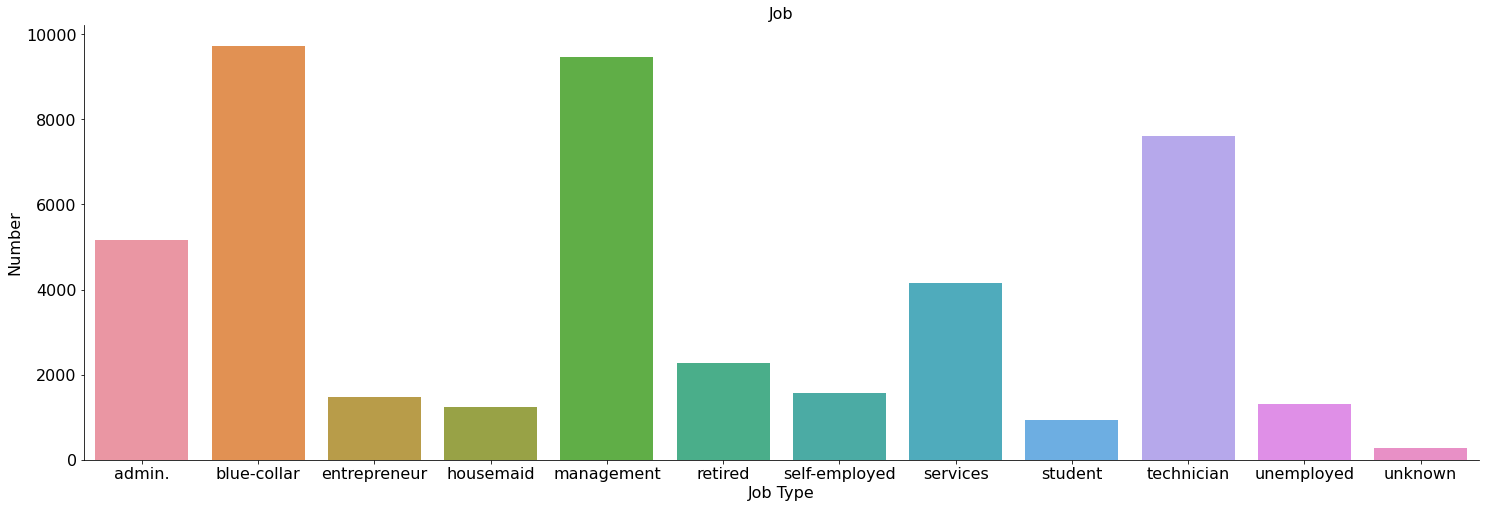

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'job', data = df[categorical])
ax.set_xlabel('Job Type', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Job', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

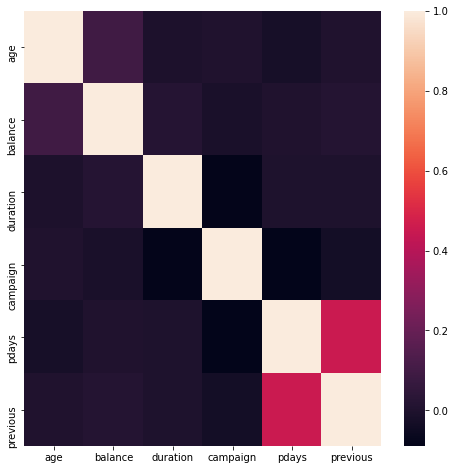

In [44]:
# some correlation trends between numerical variables
correlations = df_new.corr()
plt.figure(figsize=(8,8))
_ = sns.heatmap(correlations)

In [ ]:
# we see all correlations between pairs of numerical variable are statistically significant

In [45]:
#convert the levels of the categorical variables into dummy variables

df_new.Target.replace(['yes'], 1, inplace=True)
df_new.Target.replace(['no'], 0, inplace=True)
df_new2 = pd.get_dummies(df_new, drop_first=True)
df_new2.head()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,Target_1
0,58,2143,261,1,-1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,44,29,151,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,76,1,-1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
5,35,231,139,1,-1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
6,28,447,217,1,-1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [62]:
df_new2['OUTPUT_LABEL'] = (df_new2.Target_1 == 'yes').astype('int')
def calc_prevalence(Target_1_actual):
    # this function calculates the prevalence of the positive class (label = 1)
    return (sum(Target_1_actual)/len(Target_1_actual))

df_valid_test=df_new2.sample(frac=0.30,random_state=42)
print('Split size: %.3f'%(len(df_valid_test)/len(df_new2)))

Split size: 0.300


In [63]:
df_train_all=df_new2.drop(df_valid_test.index)

In [72]:

print('Test prevalence(n = %d):%.3f'%(len(df_valid_test),calc_prevalence(df_valid_test.OUTPUT_LABEL.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values)))

Test prevalence(n = 12958):0.000
Train all prevalence(n = 30235):0.000


###  I apologize but even after many attempts I have been unable to rectify the errors in the below cells

In [70]:
# logistic regression
# split the training data into positive and negative
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

#print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))
X_train = df_train.columns.values
X_train_all = df_train_all.columns.values
y_train = df_train['OUTPUT_LABEL'].values

lr=LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

ValueError: could not convert string to float: 'age'

In [71]:
# Decision tree

tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train, y_train)

y_train_preds = tree.predict_proba(X_train)[:,1]
y_valid_preds = tree.predict_proba(y_train)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity, tree_train_f1 =print_report(y_train,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity, tree_valid_f1 = print_report(y_valid,y_valid_preds, thresh)


ValueError: could not convert string to float: 'age'

In [73]:
# boosting

gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train, y_train)
y_train_preds = gbc.predict_proba(X_train)[:,1]
y_valid_preds = gbc.predict_proba(y_train)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity, gbc_train_f1 = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity, gbc_valid_f1 = print_report(y_valid,y_valid_preds, thresh)

ValueError: could not convert string to float: 'age'

In [ ]:
# I could not evaluate model performance due to above mentioned errors. However, it seems most likely 
# that the Boosting Classifier will have the most accuracy over others.